<a href="https://colab.research.google.com/github/Deolinda1506/Data/blob/main/Copy_of_Deolinda_data_clean0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Beats_dataset.csv', index_col=0)

df.head()


Saving Beats_dataset.csv to Beats_dataset.csv


,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,RUE030N50F9EJ,B09PYVXXW5,5.0 out of 5 stars Really good with a couple o...,CTM,5,I love TWS earbuds. I have many including buds...,"Reviewed in the United States May 14, 2022",AEGYSY5H3ZUJC4SGGPRM3Z2OE5PA,1,32,Color: Black
1,R385JSD6KWP2QU,B09PYVXXW5,4.0 out of 5 stars I wish I could rate 5 stars...,Gianna,4,…I just can’t. Because as useful as these earb...,"Reviewed in the United States July 22, 2023",AHINA7A6O2I5RZSNAY4OWYN4QXVA,1,31,Color: Red
2,R1UB1V4EPP9MN3,B09PYVXXW5,"5.0 out of 5 stars Basically perfect, fantasti...",Colin M.,5,I needed a replacement for my Galaxy buds pro'...,"Reviewed in the United States August 18, 2022",AFG2T5XGMQCACK7JBDRHKEKWJLPA,1,21,Color: Red
3,RWYK1GXIVV6H1,B09PYVXXW5,1.0 out of 5 stars Decent but Defective,Aquila,1,"UPDATE 6/24/22: As of 6/23/22, my replacement ...","Reviewed in the United States June 3, 2022",AGFUWY2GO4HF5RMLUR7ZOSKID4KA,1,9,Color: Black
4,R3FBQBGQM3II4W,B09PYVXXW5,3.0 out of 5 stars I went with soundcore instead,Frankie,3,So out of the box these tiny buds surprised me...,"Reviewed in the United States October 28, 2022",AEOFU2SCDWYLS6DTSXIR6FWMRQMQ,1,7,Color: Black


In [80]:
df.shape


(4945, 11)

Check Data Types



In [81]:

# Check the data types of each column
print(df.dtypes)

review_id             object
product_id            object
title                 object
author                object
rating                 int64
content               object
timestamp             object
profile_id            object
is_verified            int64
helpful_count          int64
product_attributes    object
dtype: object


Identify Unique Data Types Within Columns



In [82]:

# Check the unique data types in each column (especially useful for 'rating')
for col in df.columns:
    print(f"Unique data types in {col}: {df[col].apply(lambda x: type(x)).unique()}")

Unique data types in review_id: [<class 'str'>]
Unique data types in product_id: [<class 'str'>]
Unique data types in title: [<class 'str'>]
Unique data types in author: [<class 'str'> <class 'float'>]
Unique data types in rating: [<class 'int'>]
Unique data types in content: [<class 'str'> <class 'float'>]
Unique data types in timestamp: [<class 'str'>]
Unique data types in profile_id: [<class 'str'>]
Unique data types in is_verified: [<class 'int'>]
Unique data types in helpful_count: [<class 'int'>]
Unique data types in product_attributes: [<class 'str'> <class 'float'>]


In [83]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

review_id               0
product_id              0
title                   0
author                  1
rating                  0
content                 8
timestamp               0
profile_id              0
is_verified             0
helpful_count           0
product_attributes    224
dtype: int64


It looks like the missing values are distributed across various columns, but the number of missing entries is relatively small.



Handling Missing Values


Drop Missing Values

As the number of missing values is very small compared to the overall size of our dataset, and those rows aren't critical, we can drop them

Drop Rows: As the missing data is less significant (like 0-8 missing values in a dataset with thousands of rows), and those rows don't add much value, dropping them is generally safe.

In [84]:
df = df.dropna(subset=['author', 'content'])


In [85]:
# Crosschecking for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

review_id               0
product_id              0
title                   0
author                  0
rating                  0
content                 0
timestamp               0
profile_id              0
is_verified             0
helpful_count           0
product_attributes    223
dtype: int64


Check for Duplicates



In [86]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# Drop duplicates
df = df.drop_duplicates()

Number of duplicate rows: 0


Handle Outliers

Outliers can skew our analysis, so it’s important to identify and decide how to handle them.

Using statistical methods like the Interquartile Range (IQR) or Z-scores for finding outliers.

In [88]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)

Index(['rating', 'is_verified', 'helpful_count'], dtype='object')


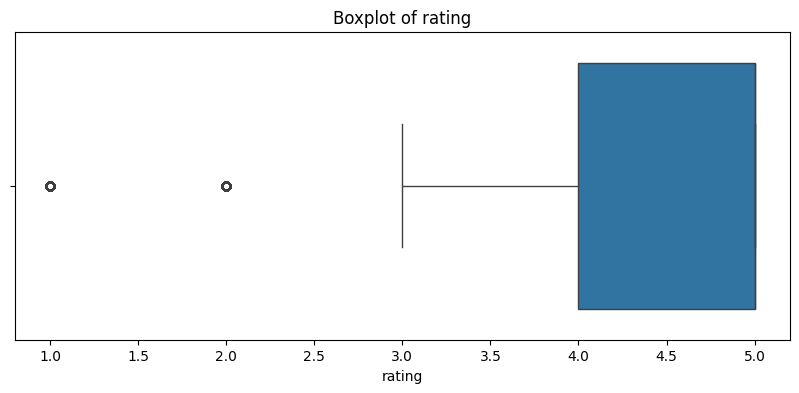

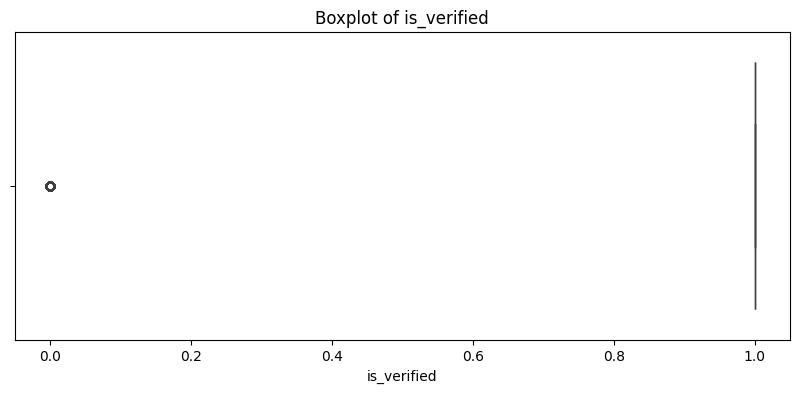

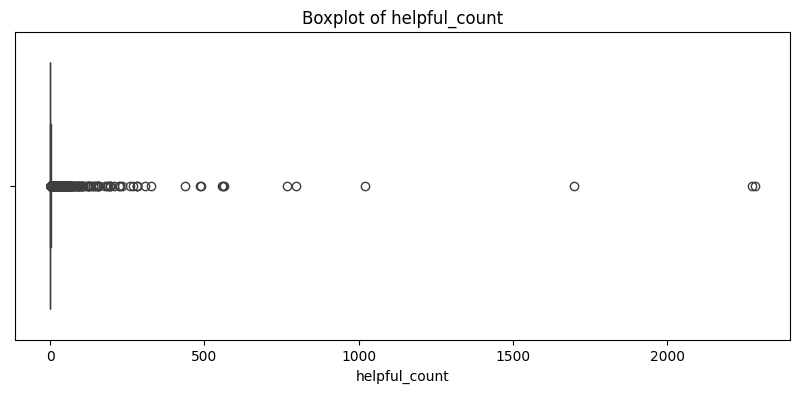

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Remove Outliers

In [90]:

Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['rating'] >= lower_bound) & (df['rating'] <= upper_bound)]

df = df[(df['is_verified'] != 0) & (df['is_verified'] != 5) & (df['helpful_count'] < 500)]

Here's a summary of what I have done:

Filter Out Non-Verified Entries (is_verified):

We're keeping only rows where is_verified is not 0 or 5, meaning we're focusing on entries that are more likely to be valid or trustworthy.

Limit the helpful_count to Less Than 500:

we're filtering out rows where helpful_count is 500 or more, keeping only those entries with a helpful_count of less than 500. This ensures we're working with reviews that are considered helpful but not excessively so, which could indicate manipulation or anomalies.

Checking the Impact of Outlier Handling

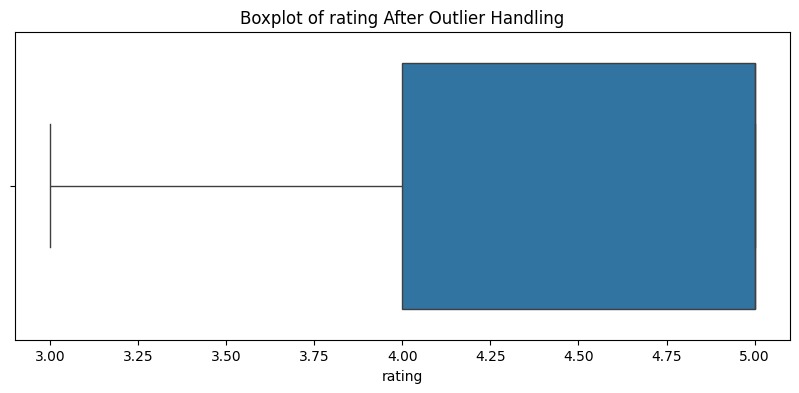

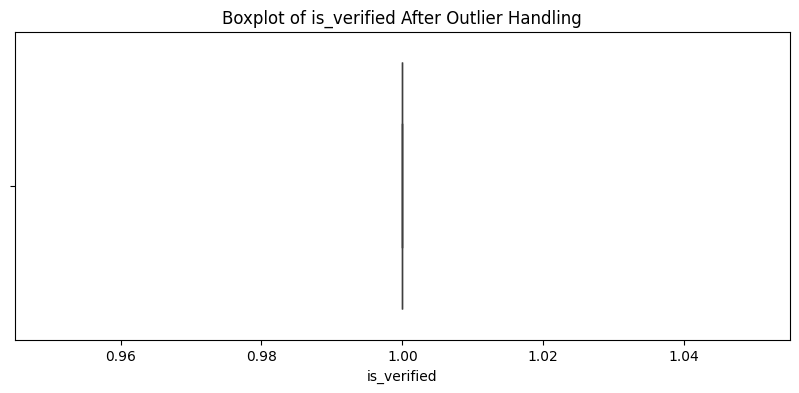

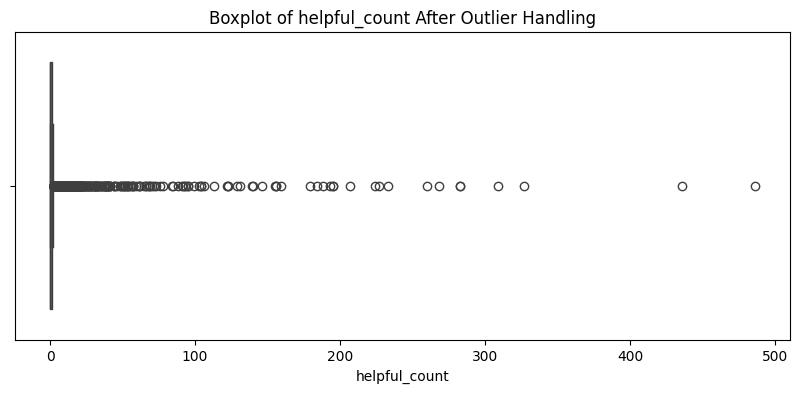

In [91]:
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} After Outlier Handling')
    plt.show()

Identify Categorical and Numerical Variables



In [103]:

# List all columns in the dataset
print(df.columns)

# Identify categorical variables (usually of type 'object' or 'category')
categorical_vars = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Variables:")
print(categorical_vars)

# Identify numerical variables (usually of type 'int64' or 'float64')
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Variables:")
print(numerical_vars)





Index(['Unnamed: 0', 'review_id', 'product_id', 'title', 'author', 'rating',
       'content', 'timestamp', 'profile_id', 'is_verified', 'helpful_count',
       'product_attributes', 'product_name'],
      dtype='object')
Categorical Variables:
Index(['review_id', 'product_id', 'title', 'author', 'content', 'timestamp',
       'profile_id', 'product_attributes', 'product_name'],
      dtype='object')
Numerical Variables:
Index(['Unnamed: 0', 'rating', 'is_verified', 'helpful_count'], dtype='object')


In [104]:
import pandas as pd

# Load your dataset
df = pd.read_csv('Beats_dataset.csv')

# Dictionary mapping ASIN to Product Name
product_mapping = {
    'B09PYVXXW5': '1MORE ComfoBuds Mini Hybrid Active Noise Cancelling Earbuds ',
    'B09H27SXHS': 'HTC Wireless Headphones',
    'B09FM6PDHP': 'JBL Tune 230NC TWS',
    'B09HN594TL': 'JLab Go Air Pop True Wireless Bluetooth Earbuds',
    'B096SV8SJG': 'Beats Studio Buds - True Wireless Noise Cancelling Earbuds',
    'B0BTZKP1TP': 'Jabra Elite 4 True Wireless Earbuds',
    'B08ZR5JB9G': 'Sennheiser CX True Wireless Earbuds',
    'B0C2F5KD26': 'Skullcandy Smokin Buds In-Ear Wireless Earbuds',
    'B0BYPFNW6T': 'Sony WF-C700N Truly Wireless Noise Canceling Earbuds',
    'B093SLWMS7': 'Soundcore by Anker Life P3 Noise Cancelling Wireless Bluetooth Earbuds',
    'B099TJGJ91': 'Bose SoundLink Flex Bluetooth Speaker',
    'B0D4SX9RC6': 'Beats Pill (2024 Release) Portable Bluetooth Speaker',
}

# Replace ASIN with Product Name
df['product_name'] = df['product_id'].map(product_mapping)

# Save the updated dataset
df.to_csv('updated_dataset.csv', index=False)
